In [1]:
!pip install keras
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras


In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 18s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


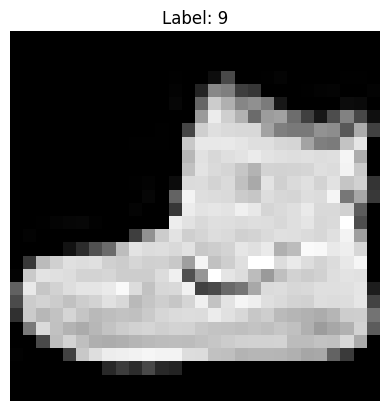

In [8]:
import matplotlib.pyplot as plt
# Select one image from the training set
image_index = 0  # Change this index to select a different image
selected_image = x_train[image_index]
selected_label = y_train[image_index]

# Display the selected image
plt.imshow(selected_image, cmap='gray')
plt.title(f"Label: {selected_label}")
plt.axis('off')  # Hide the axes
plt.show()


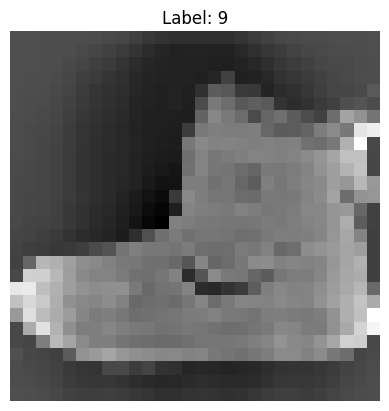

In [9]:
from sklearn.preprocessing import StandardScaler

# Flatten the images to 2D arrays
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Normalize the pixel values using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Reshape the images back to their original shape
x_train_scaled = x_train_scaled.reshape(-1, 28, 28)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28)

# Select one image from the training set
image_index = 0  # Change this index to select a different image
selected_image = x_train_scaled[image_index]
selected_label = y_train[image_index]

# Display the selected image
plt.imshow(selected_image, cmap='gray')
plt.title(f"Label: {selected_label}")
plt.axis('off')  # Hide the axes
plt.show()

In [10]:
!pip install -U scikit-learn

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.3614 - loss: 1.1064 - val_accuracy: 0.2727 - val_loss: 1.0794 - learning_rate: 0.0010
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 416ms/step - accuracy: 0.4180 - loss: 1.1041 - val_accuracy: 0.8182 - val_loss: 0.9619 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 286ms/step - accuracy: 0.5442 - loss: 0.9543 - val_accuracy: 0.8636 - val_loss: 0.8636 - learning_rate: 0.0010
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.5876 - loss: 0.9800 - val_accuracy: 0.8636 - val_loss: 0.7729 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.5386 - loss: 0.9408 - val_accuracy: 0.8636 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step - accuracy: 0.7440 - loss: 0.8080 - val_accuracy: 0.8636 - val_loss: 0.6197 - learning_rate: 0.0010
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.7121 - loss: 0.7379 - val_accur

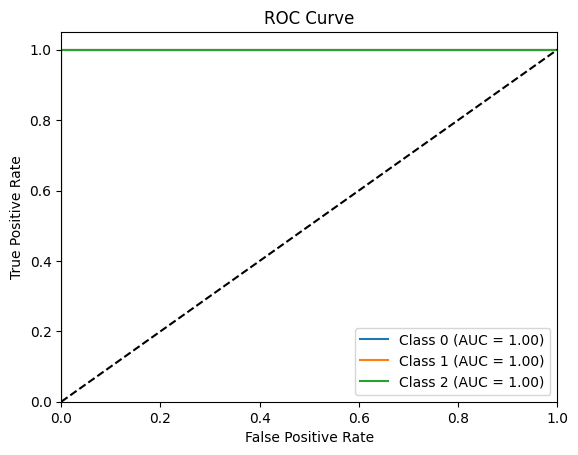

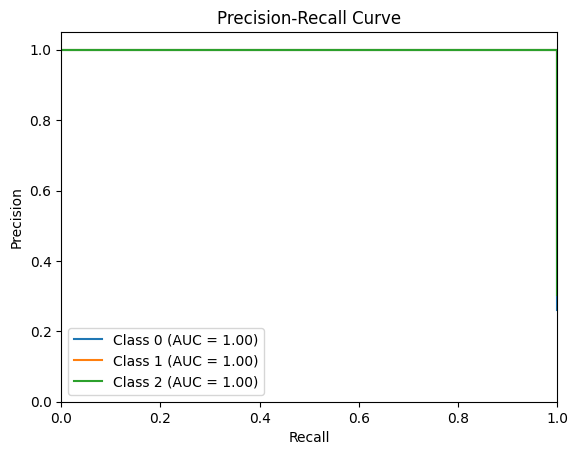

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Confusion Matrix:
[[ 6  0  0]
 [ 0 10  0]
 [ 0  0  7]]
TP: [ 6 10  7], TN: [17 13 16], FP: [0 0 0], FN: [0 0 0]
Variance: 2.86
Bias: 2.86


In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Load the data
iris = load_iris()
X = iris.data
y = iris.target

# Convert to one-hot encoding
y = tf.keras.utils.to_categorical(y, 3)

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, 
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Evaluate the model
model.load_weights('best_model.keras')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
cm = confusion_matrix(y_true, y_pred_classes)

# Calculate TP, TN, FP, FN for each class
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Precision-Recall Curve
precision_curve = dict()
recall_curve = dict()
pr_auc = dict()
for i in range(3):
    precision_curve[i], recall_curve[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    pr_auc[i] = auc(recall_curve[i], precision_curve[i])

# Plot ROC Curve
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall Curve
plt.figure()
for i in range(3):
    plt.plot(recall_curve[i], precision_curve[i], label=f'Class {i} (AUC = {pr_auc[i]:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Calculate variance and bias
train_accuracy = max(history.history['accuracy']) * 100
optimal_accuracy = 100
variance = abs(optimal_accuracy - train_accuracy)

validation_accuracy = max(history.history['val_accuracy']) * 100
bias = abs(train_accuracy - validation_accuracy)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Confusion Matrix:\n{cm}')
print(f'TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}')
print(f'Variance: {variance:.2f}')
print(f'Bias: {bias:.2f}')
